In [ ]:
!pip install emnist
!pip install -U tensorboard-plugin-profile
!python -c "import emnist; emnist.ensure_cached_data()"
!cd "/content/drive/MyDrive/Colab Notebooks"
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")
os.getcwd()

     |████████████████████████████████| 1.2MB 10.9MB/s 


'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
import emnist as e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import cv2

#keras
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics as metrics
import sklearn

  

import tensorflow as tf
import os
import contextlib
import datetime

In [ ]:

train_images, train_labels = e.extract_training_samples('letters')
test_images, test_labels = e.extract_test_samples('letters')

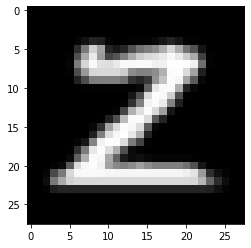

In [ ]:
i = 3001
plt.imshow(test_images[i].reshape(28,28))
test_labels == i + ord('N')
np.where(test_labels == 26)
plt.imshow(test_images[20003].reshape(28,28),cmap="gray")


In [ ]:

print("train_y: ", train_images.shape)
print("test_y: ", train_labels.shape)
test_images.reshape((-1, 28, 28, 1)).shape

train_y:  (124800, 28, 28)
test_y:  (124800,)


(20800, 28, 28, 1)

In [ ]:
os.environ["TF_GPU_THREAD_MODE"] = 'gpu_private'

model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model1.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model1.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(BatchNormalization())    
model1.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model1.add(MaxPooling2D(pool_size=(2,2)))
    
model1.add(Flatten())
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(512,activation="relu"))
    
model1.add(Dense(27,activation="softmax"))

model1.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(27, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [ ]:
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
train_images,val_images, train_labels, val_labels = train_test_split(train_images,train_labels,
                                         test_size=0.20,random_state=42)
test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#test_labels = to_categorical(test_labels)

In [ ]:
batch_size = 64
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


train_gen = datagen.flow(train_images, train_labels, batch_size=batch_size)
val_gen = datagen.flow(val_images, val_labels, batch_size=batch_size)

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1, profile_batch = '500,520')
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

In [ ]:
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                 patience=5, 
                                 verbose=2, 
                                 factor=.75)
cd = os.getcwd
model_checkpoint= tf.keras.callbacks.ModelCheckpoint("/best_result", save_best_only=True,monitor='val_loss', verbose=1)

In [ ]:
model = model1
model.fit(train_gen, epochs=100, batch_size=batch_size ,steps_per_epoch = train_images.shape[0] // batch_size,
          validation_data=(val_images,val_labels),
          callbacks=[lr_reduction, model_checkpoint])

!cp -r /best_result  '/content/drive/My Drive/Colab Notebooks/'

Epoch 1/100
1560/1560 [==============================] - 55s 35ms/step - loss: 0.0555 - accuracy: 0.9755 - val_loss: 0.1884 - val_accuracy: 0.9520

Epoch 00001: val_loss did not improve from 0.18438
Epoch 2/100
1560/1560 [==============================] - 55s 35ms/step - loss: 0.0554 - accuracy: 0.9752 - val_loss: 0.1861 - val_accuracy: 0.9535

Epoch 00002: val_loss did not improve from 0.18438
Epoch 3/100
1560/1560 [==============================] - 55s 35ms/step - loss: 0.0550 - accuracy: 0.9751 - val_loss: 0.1891 - val_accuracy: 0.9528

Epoch 00003: val_loss did not improve from 0.18438
Epoch 4/100
1560/1560 [==============================] - 55s 35ms/step - loss: 0.0551 - accuracy: 0.9753 - val_loss: 0.1898 - val_accuracy: 0.9521

Epoch 00004: val_loss did not improve from 0.18438
Epoch 5/100
1560/1560 [==============================] - 55s 35ms/step - loss: 0.0549 - accuracy: 0.9756 - val_loss: 0.1902 - val_accuracy: 0.9524

Epoch 00005: val_loss did not improve from 0.18438
Epoch

KeyboardInterrupt: ignored

In [ ]:
cnn_model = models.load_model('/best_result')

In [ ]:
loss, acc = cnn_model.evaluate(test_images,to_categorical(test_labels),verbose=0)


[0.2025904506444931, 0.951442301273346]

Normalized confusion matrix


'I'

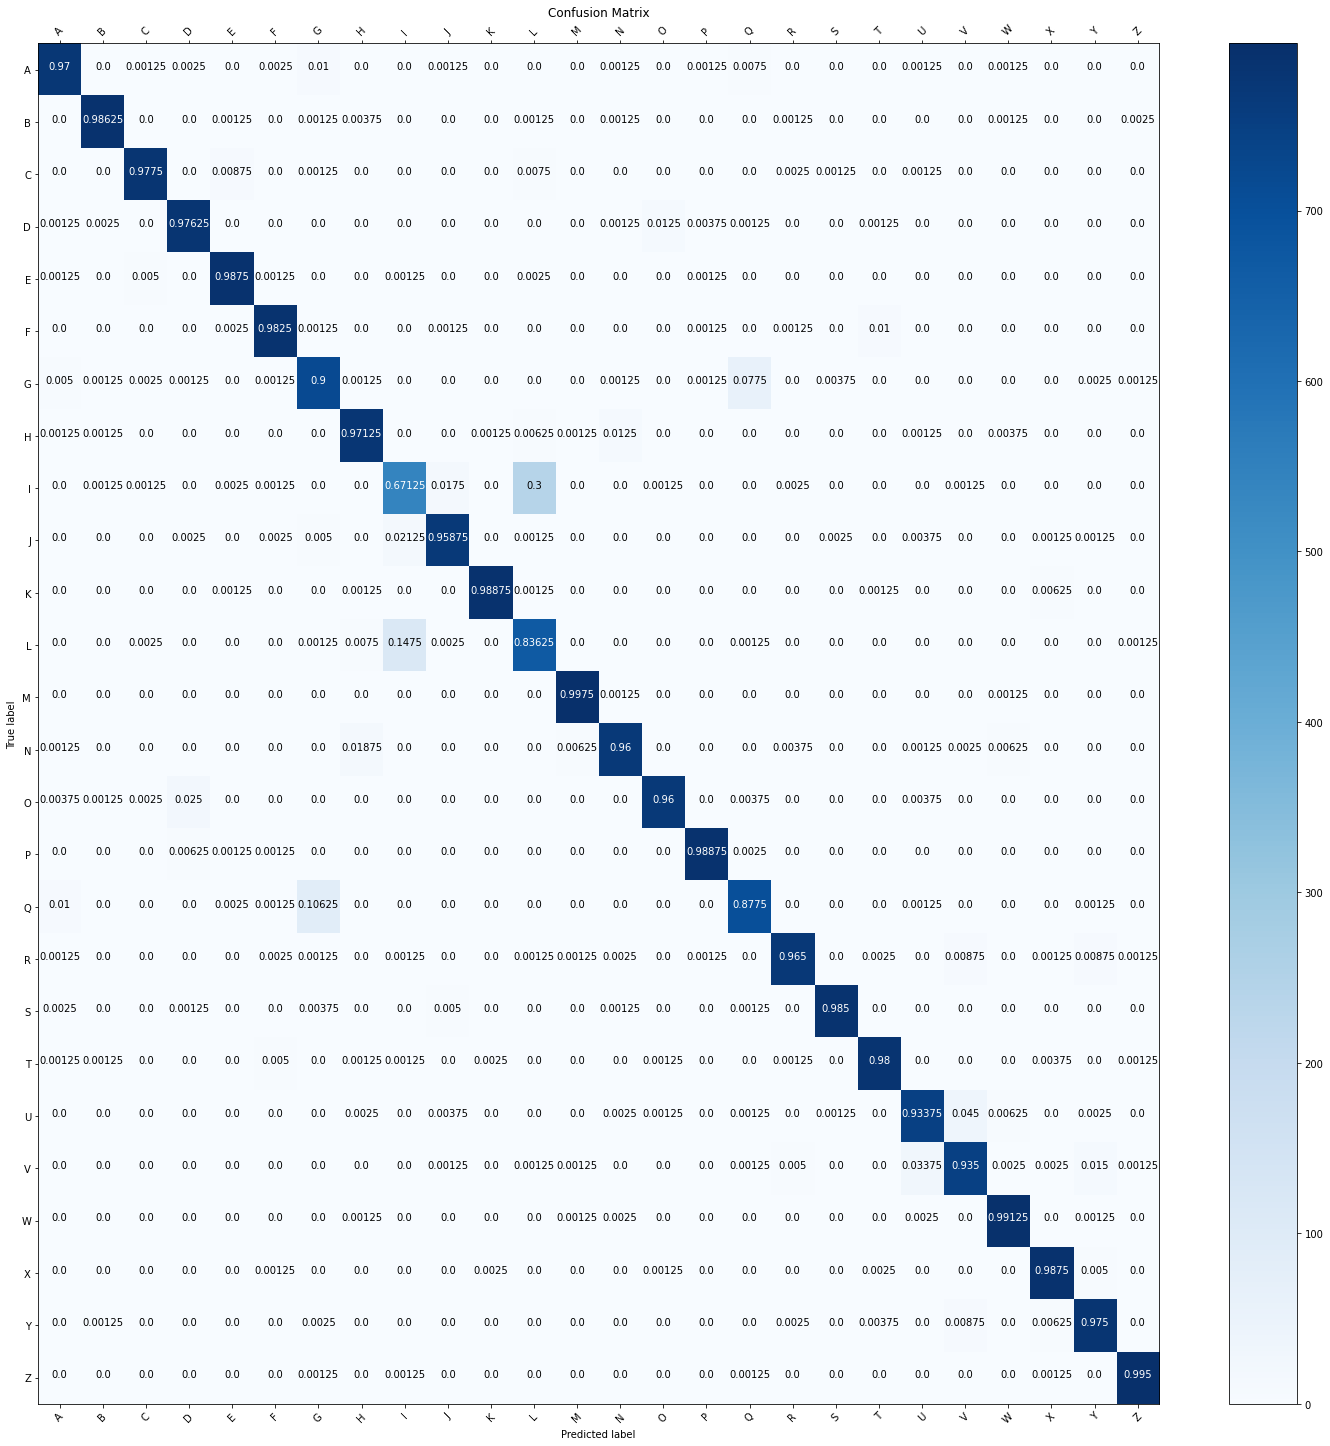

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred = cnn_model.predict(test_images)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_true=test_labels, y_pred=y_pred)


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.figure(figsize = (20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_plot_labels = [chr(i) for i in range(65,91)]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize=True)

chr(65 + np.argmin(np.sum(cm,axis=0)))